<a href="https://colab.research.google.com/github/HigurashiKagome/AI/blob/main/10_6AI%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_04

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_04


In [25]:
weather = pd.read_csv('data/weather_by_station.csv', index_col='date', parse_dates=True)
weather.head()

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.0,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"


In [ ]:
import numpy as np
import pandas as pd



fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


In [ ]:
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True) # 페북 주가
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [44]:
volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high'])
volume_binned.value_counts()

low     240
med       8
high      3
Name: volume, dtype: int64

In [46]:
import os
import sys
sys.path.append("/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/visual-aids")

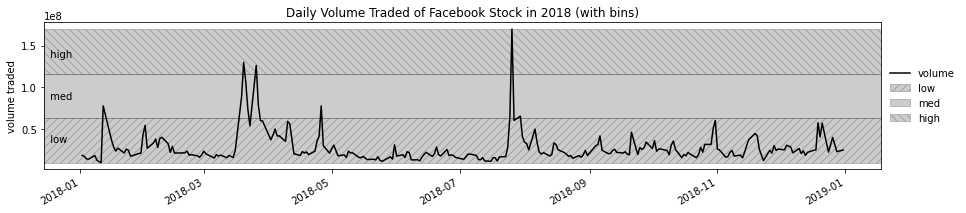

In [47]:
from visual_aids.misc_viz import low_med_high_bins_viz

low_med_high_bins_viz(
    fb, 'volume', ylabel='volume traded',
    title='Daily Volume Traded of Facebook Stock in 2018 (with bins)'
)

In [ ]:
fb.assign(
    volume_pct_change=fb.volume.pct_change(),
    pct_change_rank=lambda x:  
    # 람브다함수 - 정규분포 \ 줄바꿈
        x.volume_pct_change.abs().rank(ascending=False)
).nsmallest(5, 'pct_change_rank') # 거래량 변화량 랭크

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [ ]:
fb.assign(
    abs_z_score_volume=lambda x: \
        x.volume.sub(x.volume.mean()).div(x.volume.std()).abs() # 표준화
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [ ]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


In [ ]:
fb.pivot_table(index='volume')

,close,high,low,open
volume,,,,
9588587,187.77,188.40,187.38,188.40
10529894,187.84,187.89,185.63,186.94
10965061,184.92,186.33,184.45,186.02
11078209,207.23,208.72,206.84,207.50
11350429,208.09,209.99,207.76,208.77
...,...,...,...,...
88140060,172.56,177.17,170.06,177.01
106598834,169.39,173.40,163.30,164.80
126116634,160.06,161.10,149.02,160.82


In [ ]:
fb_agg = fb.groupby('trading_volume').agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})
fb_agg

open    high             low               close
                      mean     min     max     min     max        mean
trading_volume                                                        
low             171.355565  129.74  216.20  123.02  212.60  171.431771
med             175.818125  162.85  218.62  150.75  214.27  175.143750
high            167.726667  161.10  180.13  149.02  173.75  168.156667

In [30]:
dp = weather.query('datatype == "PRCP"').groupby(level=0).mean() 

In [20]:
dp

,value
0,0.0
1,0.0
3,0.0
6,0.0
9,0.0
...,...
78736,28.7
78743,25.9
78751,29.2
78760,24.4


In [35]:
# 맞나이거
weather.query('datatype == "PRCP"')\
    .groupby(level=0).mean()\
    .groupby(pd.Grouper(freq='Q')).sum().value.nlargest()

date
2018-09-30    546.518380
2018-12-31    473.972345
2018-03-31    364.885769
2018-06-30    334.893094
Name: value, dtype: float64

In [27]:
weather.query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(level=0).mean()\ # level - 
    .groupby(pd.Grouper(freq='M'))\
    .transform(np.sum)['2018-01-28':'2018-02-03']

,prcp
date,
2018-01-28,69.313689
2018-01-29,69.313689
2018-01-30,69.313689
2018-01-31,69.313689
2018-02-01,158.114522
2018-02-02,158.114522
2018-02-03,158.114522


In [23]:
fb.pivot_table(index='trading_volume')

,close,high,low,open,volume
trading_volume,,,,,
low,171.431771,173.461040,169.306252,171.355565,2.454721e+07
med,175.143750,179.420000,172.107500,175.818125,7.907256e+07
high,168.156667,170.476667,161.573333,167.726667,1.419240e+08


In [29]:
#Task2
pd.crosstab(
    index = fb.trading_volume,
    columns = fb.index.month,
    colnames = ['month']
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [36]:
dp.groupby(pd.Grouper(freq='Q')).sum()

,value
date,
2018-03-31,364.885769
2018-06-30,334.893094
2018-09-30,546.518380
2018-12-31,473.972345


In [37]:
dp.groupby(pd.Grouper(freq='Q')).value.count()

date
2018-03-31    90
2018-06-30    91
2018-09-30    92
2018-12-31    92
Freq: Q-DEC, Name: value, dtype: int64

In [38]:
fb_agg = fb.groupby('trading_volume').agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})
fb_agg

open    high             low               close
                      mean     min     max     min     max        mean
trading_volume                                                        
low             171.355565  129.74  216.20  123.02  212.60  171.431771
med             175.818125  162.85  218.62  150.75  214.27  175.143750
high            167.726667  161.10  180.13  149.02  173.75  168.156667

In [40]:
# Task1
dp = weather.query('datatype == "PRCP"').groupby(level=0).mean() 
dp

,value
date,
2018-01-01,0.000000
2018-01-02,0.000000
2018-01-03,0.000000
2018-01-04,4.916071
2018-01-05,12.303571
...,...
2018-12-27,0.000000
2018-12-28,10.462025
2018-12-29,18.655263


In [41]:
dp.groupby(pd.Grouper(freq='Q')).value.count()

date
2018-03-31    90
2018-06-30    91
2018-09-30    92
2018-12-31    92
Freq: Q-DEC, Name: value, dtype: int64

In [42]:
dp.groupby(pd.Grouper(freq='Q')).sum()

,value
date,
2018-03-31,364.885769
2018-06-30,334.893094
2018-09-30,546.518380
2018-12-31,473.972345


In [ ]:
dp.assign(
    total_
)

In [43]:
#Task2
pd.crosstab(
    index = fb.trading_volume,
    columns = fb.index.month,
    colnames = ['month']
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [51]:
fb.pivot_table(
    index='trading_volume',
    columns=fb.index.month,
    values='close',
    aggfunc='count'
  )

date,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0
